##Initial modelling to determine # of components

In [0]:
#Linear PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
# Import required libraries for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Linear PCA
PCAObj = PCA(n_components=None)
X_train = PCAObj.fit_transform(X_train)
X_test = PCAObj.transform(X_test)



Number of components with 0.95 cumulative variance:  249


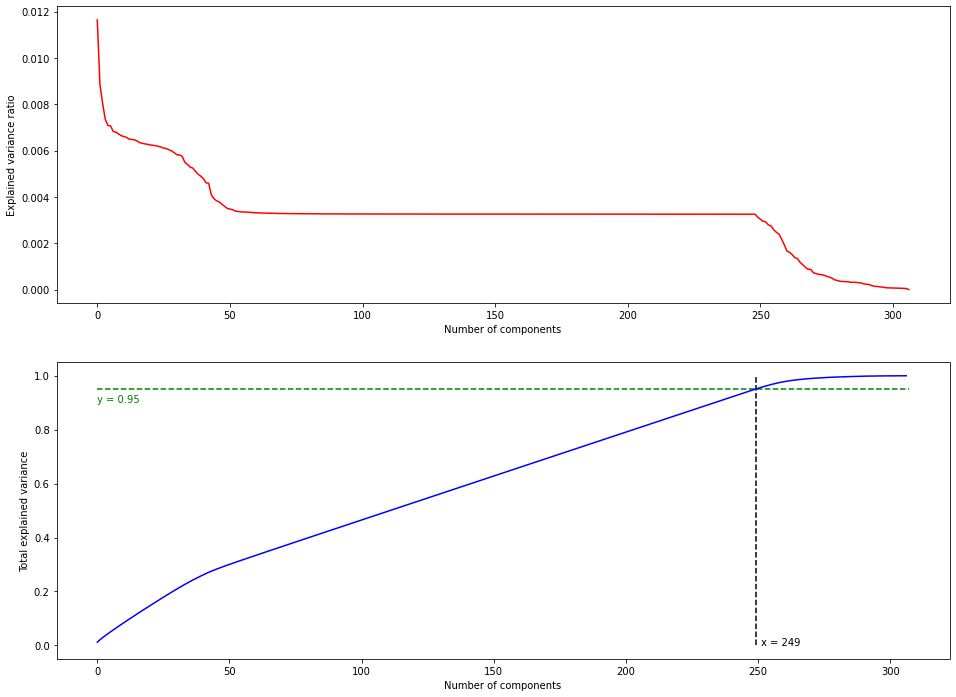

In [3]:
# Define cumulative explained variance ratio
total_variance = np.cumsum(PCAObj.explained_variance_ratio_)

# Show when total_variance is 0.95 using a plot
plt.figure(1, figsize=[16,12])
plt.subplot(211)
plt.plot(PCAObj.explained_variance_ratio_, c='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

plt.subplot(212)
plt.plot(total_variance, c='blue')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
# Look for where cumulative explained variance is 0.95
expl_95_index = np.where((total_variance > 0.949) & (total_variance < 0.951))[0][0]
print('Number of components with 0.95 cumulative variance: ', expl_95_index)
plt.hlines(0.95, 0, len(total_variance), linestyles='dashed', color='green')
plt.vlines(expl_95_index, 0, 1, linestyles='dashed')
plt.text(0, 0.95-0.05, 'y = 0.95', color='green')
plt.text(expl_95_index+2, 0, 'x = '+str(expl_95_index))

plt.show()

# Clear variables except the index to "reset" the runtime

In [4]:
%reset_selective -f ^(?!expl_95_index).*$ 

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Run PCA with the # of components from above

In [0]:
#Linear PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
try:
  dataset = pd.read_csv('drive/My Drive/processed.csv')
except:
  dataset = pd.read_csv('processed.csv')

# print(dataset)

X = dataset.iloc[:,2:].values #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
# Import required libraries for making a PCA pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Pipeline for predicting the target
LR_PCA_pipeline = Pipeline([
                    ('scale', StandardScaler()), 
                    ('PCA', PCA(n_components=expl_95_index)),
                    ('LR', LinearRegression())
                     ], verbose=True)

LR_PCA_pipeline.fit(X_train, y_train)
y_pred = LR_PCA_pipeline.predict(X_test)

[Pipeline] ............. (step 1 of 3) Processing scale, total=   1.3s
[Pipeline] ............... (step 2 of 3) Processing PCA, total=   6.3s
[Pipeline] ................ (step 3 of 3) Processing LR, total=   2.7s


In [7]:
# Evaluating the model
print(mean_squared_error(y_test, y_pred))

print(y_test)
print(y_pred)
print(mean_squared_error(10**y_test, 10**y_pred))

0.0842831499245702
[3.11394335 4.0374265  3.91381385 ... 4.10720997 3.87506126 3.54406804]
[2.8640125  3.9968724  3.78759324 ... 4.2347028  4.19279379 3.39635238]
91037812.76960085
